# Topic 1: A comparison of different ML/DL/EC approaches used to solve a real-life problem.

## Problem:
The real-life problem we pick is that using ML approache for stock market prediction. 

* Firstly import the packages to be used.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* Load the dataset

In [2]:
data = pd.read_csv('./data.csv',index_col='Date')
data.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2010/7/21,24.333,24.333,23.946,23.946,43321,0
2010/7/22,24.644,24.644,24.362,24.487,18031,0
2010/7/23,24.759,24.759,24.314,24.507,8897,0
2010/7/26,24.624,24.624,24.449,24.595,19443,0
2010/7/27,24.477,24.517,24.431,24.517,8456,0


* Gen a Historical trend chart for reference

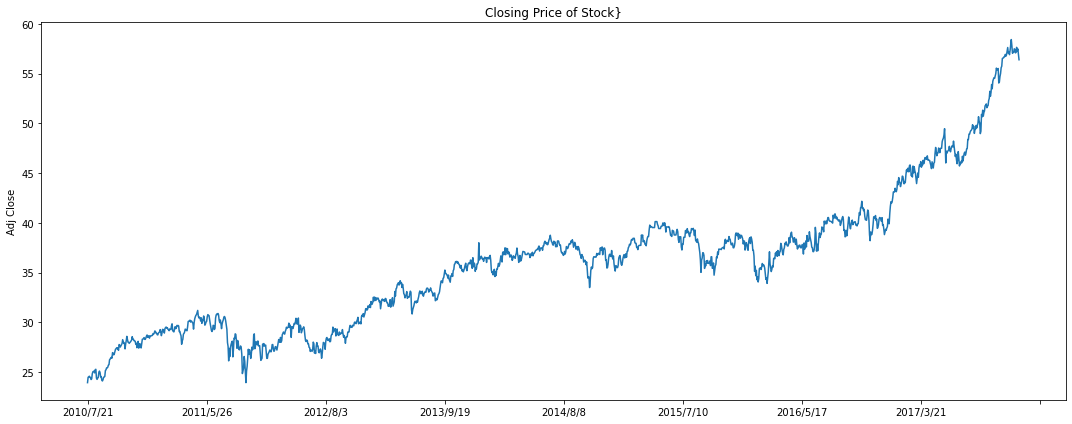

In [3]:
# Historical trend chart
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

data['Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Closing Price of Stock}")
    
plt.tight_layout()

# Prepare data

* First 95% for training, other 5% for testing

In [4]:
data = data.filter(['Close'])
dataset = data.values
# Divide training set and test set
training_data_len = int(np.ceil( len(dataset) * .95 ))

* Normalization

In [5]:
# data normalization from 0 to 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

* Training set

In [6]:
# building train data
# use first 60 days of data to predict the 61st day of data
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

* Test set

In [7]:
# building test data
test_data = scaled_data[training_data_len - 60: , :]
x_test = []

y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# LSTM model



In [89]:
# lstm model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

tf.random.set_seed(1234)

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=1427,
    decay_rate=0.9)
opt = tf.keras.optimizers.Adam(learning_rate = lr_schedule)

model.compile(optimizer=opt, loss='mean_squared_error')

# train a model
model.fit(x_train, y_train, batch_size=1, epochs=30)

Epoch 1/30
1427/1427 [==============================] - 21s 14ms/step - loss: 0.0029
Epoch 2/30
1427/1427 [==============================] - 19s 14ms/step - loss: 9.1912e-04
Epoch 3/30
1427/1427 [==============================] - 19s 14ms/step - loss: 9.3289e-04
Epoch 4/30
1427/1427 [==============================] - 20s 14ms/step - loss: 6.4628e-04
Epoch 5/30
1427/1427 [==============================] - 20s 14ms/step - loss: 6.0762e-04
Epoch 6/30
1427/1427 [==============================] - 21s 15ms/step - loss: 4.9089e-04
Epoch 7/30
1427/1427 [==============================] - 20s 14ms/step - loss: 3.7205e-04
Epoch 8/30
1427/1427 [==============================] - 20s 14ms/step - loss: 3.3256e-04
Epoch 9/30
1427/1427 [==============================] - 20s 14ms/step - loss: 3.1700e-04
Epoch 10/30
1427/1427 [==============================] - 20s 14ms/step - loss: 2.9713e-04
Epoch 11/30
1427/1427 [==============================] - 20s 14ms/step - loss: 2.7293e-04
Epoch 12/30
1427/1427 [

In [90]:
# predict
predictions_lstm = model.predict(x_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

# get the lstm model rmse rate
rmse_ltsm = np.sqrt(np.mean(((predictions_lstm - y_test) ** 2)))
print("LSTM model rmse rate：{}".format(rmse_ltsm))

LSTM model rmse rate：0.46179269393126077


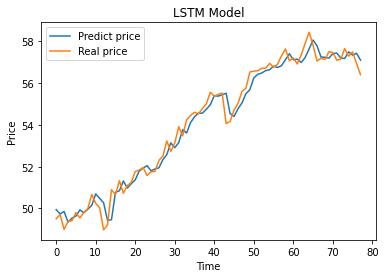

In [91]:
# Visualising the LTSM results
plt.plot(predictions_lstm, label="Predict price")
plt.plot(y_test, label="Real price")

plt.title("LSTM Model") 
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# GRU model

In [68]:
# gru model
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(1234)

model = tf.keras.Sequential([
    layers.GRU(128, return_sequences=True),
    layers.Dropout(0.2),
    layers.GRU(64),
    layers.Dropout(0.2),
    layers.Dense(1)
])

opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer = opt, loss='mean_squared_error')

# train a model
model.fit(x_train, y_train, batch_size=1, epochs=30)

Epoch 1/30
1427/1427 [==============================] - 20s 13ms/step - loss: 0.0040
Epoch 2/30
1427/1427 [==============================] - 18s 13ms/step - loss: 0.0013
Epoch 3/30
1427/1427 [==============================] - 18s 13ms/step - loss: 0.0011
Epoch 4/30
1427/1427 [==============================] - 18s 13ms/step - loss: 0.0012
Epoch 5/30
1427/1427 [==============================] - 18s 12ms/step - loss: 9.6363e-04
Epoch 6/30
1427/1427 [==============================] - 18s 13ms/step - loss: 9.5126e-04
Epoch 7/30
1427/1427 [==============================] - 18s 13ms/step - loss: 8.8838e-04
Epoch 8/30
1427/1427 [==============================] - 18s 13ms/step - loss: 8.9624e-04
Epoch 9/30
1427/1427 [==============================] - 18s 13ms/step - loss: 8.2340e-04
Epoch 10/30
1427/1427 [==============================] - 19s 13ms/step - loss: 8.0585e-04
Epoch 11/30
1427/1427 [==============================] - 19s 13ms/step - loss: 6.8467e-04
Epoch 12/30
1427/1427 [============

In [71]:
# predict
predictions_gru = model.predict(x_test)
predictions_gru = scaler.inverse_transform(predictions_gru)

# get the gru model rmse rate
rmse_gru = np.sqrt(np.mean(((predictions_gru - y_test) ** 2)))
print("GRU mode rmse rate：{}".format(rmse_gru))

GRU mode rmse rate：0.4702152477814693


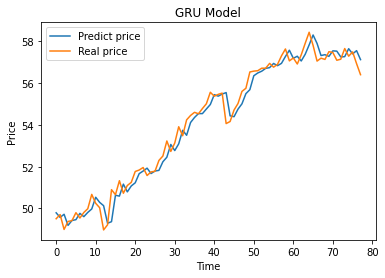

In [72]:
# Visualising the results
plt.plot(predictions_gru, label="Predict price")
plt.plot(y_test, label="Real price")

plt.title("GRU Model") 
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# MLP model

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tf.random.set_seed(1234)

In [104]:
# mlp model
model = Sequential()
model.add(Dense(120, activation='relu', input_shape = (x_train.shape[1],)))
model.add(Dense(60,activation='relu'))
model.add(Dense((1),activation="relu"))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=30)

Epoch 1/30
1427/1427 [==============================] - 1s 602us/step - loss: 0.0015
Epoch 2/30
1427/1427 [==============================] - 1s 586us/step - loss: 9.5552e-04 0s - loss: 9.7022e-0
Epoch 3/30
1427/1427 [==============================] - 1s 592us/step - loss: 6.4259e-04
Epoch 4/30
1427/1427 [==============================] - 1s 617us/step - loss: 5.5948e-04
Epoch 5/30
1427/1427 [==============================] - 1s 584us/step - loss: 5.4760e-04
Epoch 6/30
1427/1427 [==============================] - 1s 583us/step - loss: 5.9429e-04 0s - loss: 6.0612e-
Epoch 7/30
1427/1427 [==============================] - 1s 587us/step - loss: 4.7862e-04
Epoch 8/30
1427/1427 [==============================] - 1s 580us/step - loss: 4.0273e-04
Epoch 9/30
1427/1427 [==============================] - 1s 575us/step - loss: 3.6999e-04
Epoch 10/30
1427/1427 [==============================] - 1s 585us/step - loss: 3.8509e-04
Epoch 11/30
1427/1427 [==============================] - 1s 591us/step -

In [105]:
# predict
predictions_mlp = model.predict(x_test)
predictions_mlp = scaler.inverse_transform(predictions_mlp)

# get the MLP model rmse rate
rmse_mlp = np.sqrt(np.mean(((predictions_mlp - y_test) ** 2)))
print("MLP model rmse rate：{}".format(rmse_mlp))

MLP model rmse rate：0.5760352771080948


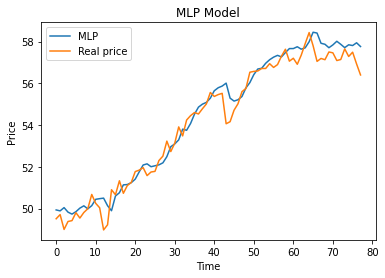

In [106]:
plt.plot(predictions_mlp, label="MLP")
plt.plot(y_test, label="Real price")

plt.title("MLP Model") 
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Summary

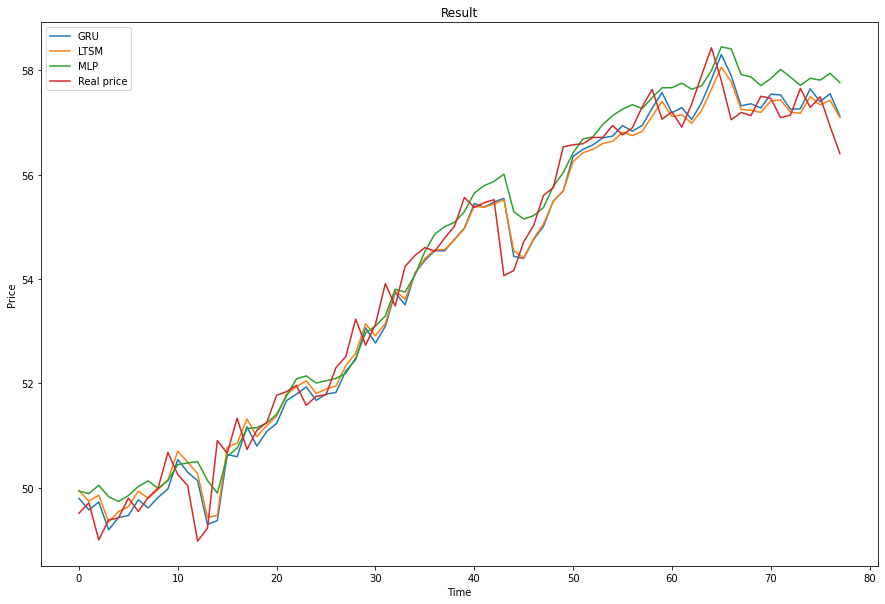

In [107]:
plt.figure(figsize=(15, 10))
plt.plot(predictions_gru, label="GRU")
plt.plot(predictions_lstm, label="LTSM")
plt.plot(predictions_mlp, label="MLP")
plt.plot(y_test, label="Real price")

plt.title("Result") 
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [108]:
import pandas as pd
data = {'Model':['LTSM', 'GRU', 'MLP'], 'RMSE':[rmse_ltsm, rmse_gru, rmse_mlp]}
df = pd.DataFrame(data)
print (df)

  Model      RMSE
0  LTSM  0.461793
1   GRU  0.470215
2   MLP  0.576035


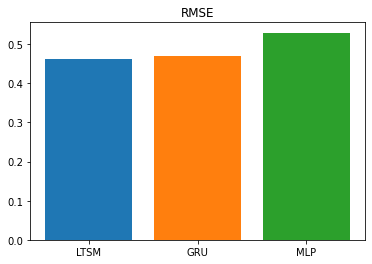

In [103]:
plt.bar("LTSM", rmse_ltsm)
plt.bar("GRU", rmse_gru)
plt.bar("MLP", rmse_mlp)
plt.title("RMSE") 
plt.show()